#Installation and adding a library
-----------------------------
In this code, we need several libraries, most of which are installed by default in the Colab environment. We install any other necessary libraries and, finally, add them to the code.

In [1]:
!pip install gym

import numpy as np
import gym
import random
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

# How the algorithm works and executes
We use the Gym library to solve the problem of the frozen lake. This library provides reinforcement learning capabilities, and we need two things to create the Q-learning table ∇.

* Number of states
* Number of cells on the map

Here, our map is 4*4, which gives us 16 different states. The selectable states are up, down, left, and right, resulting in 4 states in total for our Q-learning table.

16*4

With the Q-learning approach, we try to estimate the weights of these numbers in a way that our character, considering the correct weights, chooses the path and reaches from the starting cell 1 to the ending cell, which is cell 16.

# Parameters
In this section, we define parameters that include values for learning rate, step constraints, and the gamma parameter. These parameters are crucial for the model and its learning process.

We also have parameters for the randomness level and the rate of reducing this randomness, which are used for the model's selection of the next stage.

In [14]:
learn_rate = 0.9 # learning rate of model
steps_limit = 100# the model cannot make more than 100 choice in a run (avoide infinit loop)
gamma = 0.95      # Q-learnign discounting parameter

# Exploration parameters
exploration_rate = 1.0                 # how much model want to explore randomly
min_exploration_rate = 0.01            # min randomly exploration
decrease_exploration_rate = 0.01     # decrease randomly exploration by this factor

# Environment Generation Function
In this section, we have the environment generation function. Using the Gym library, we create a 4*4 environment, and based on the number of states and the number of cells in the output table, we also create the Q-learning weights for each action.

In [15]:
def createTable():
  frozenlake_env = gym.make("FrozenLake-v1",render_mode = 'rgb_array',  is_slippery=False) # use Gym library
  actions = frozenlake_env.action_space.n
  states = frozenlake_env.observation_space.n
  tbl = np.zeros((states, actions)) # states 4*4=16 , actions 4 (left,up,right,down)
  result_text = f"shape of Q-Learning weight table {tbl.shape}"
  return frozenlake_env, tbl, result_text # return frozen lake environment & Q-Learning weight table & shape of table

# Training and Testing Function
In this function, we first train the model for 30,000 episodes, and at the end, we test the model in 100 episodes to determine its accuracy.

In [16]:

def train_test(env, q_learning_table, learn_rate, steps_limit, gamma, exploration_rate, min_exploration_rate, decrease_exploration_rate):
    #========================== Train the model ==========================
    new_q_learning_table = q_learning_table.copy()
    Rewards  = list()
    episode_num = list()
    reward = 0
    for episode in range(30000): # Total learning episodes 30k
        Rewards.append(reward)
        episode_num.append(episode)
        state = env.reset()[0] # reset character to state 0
        finished = False

        for step in range(steps_limit):
            exp_exp_tradeoff = random.uniform(0, 1) # select a random number at first

            # ------------------------------------ select new state ------------------------------------
            if exp_exp_tradeoff > exploration_rate: # first action we have a good rate to choose we select it else we randomly select an state
                action = np.argmax(new_q_learning_table[state,:])
            else:
                action = env.action_space.sample()


            # ------------------------------------ calculate results of new state ------------------------------------
            new_state, reward, finished, info,_ = env.step(action) # we take action a to get the results


            # ------------------------------------ train the model with current step results ------------------------------------

            # in here we update the Q Learning table with the action and step
            new_q_learning_table[state, action] = new_q_learning_table[state, action] + learn_rate * (reward + gamma * np.max(new_q_learning_table[new_state, :]) - new_q_learning_table[state, action])
            state = new_state # replace new state with current state

            if finished == True: # if the finished flag be active means we died or reach goal
                break


        # adjuct the new exploration rate base on formula
        exploration_rate = min_exploration_rate + (1.0 - min_exploration_rate)*np.exp(-decrease_exploration_rate*episode)

    return new_q_learning_table, Rewards, episode_num


# In this section, we execute two functions.

In [17]:
env,q_learning_table,table_shape = createTable()
new_q_learning_table, Rewards, episode_num = train_test(env, q_learning_table, learn_rate, steps_limit, gamma, exploration_rate, min_exploration_rate, decrease_exploration_rate)
env.close()

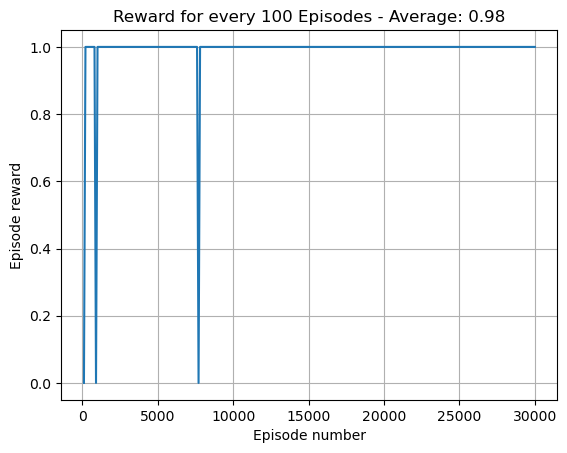

In [18]:
indices = range(100, 30000 + 1, 100)
episode_selected = [episode_num[i - 1] for i in indices]
reward_selected = [np.mean(Rewards[i - 1]) for i in indices]
avg_reward = np.mean(Rewards)

plt.plot(episode_selected, reward_selected)  # Line plot
plt.xlabel('Episode number')
plt.ylabel('Episode reward')
plt.title('Reward for every 100 Episodes - Average: {:0.2f}'.format(avg_reward))
plt.grid(True)
plt.show()

In [19]:
#========================== Test the model ==========================
total_win_rate = 0

total_steps = 100
list_of_finished_steps = []
for episode in range(total_steps):
    state = env.reset()[0] # we reset the environment to step 0
    finished = False
    for step in range(steps_limit):

        # ------------------------------------ select new state ------------------------------------
        action = np.argmax(new_q_learning_table[state,:]) # get the data from learned table
        # ------------------------------------ calculate results of new state ------------------------------------
        new_state, reward, finished, info,_ = env.step(action) # calculate results of the action
        
        

        if finished: #  if game end
            screen = env.render()
            
            if new_state == 15: # if we end the game in step 15
                total_win_rate += 1
                list_of_finished_steps.append(step)
            break
        state = new_state
list_of_finished_steps = np.array(list_of_finished_steps)


In [20]:
total_win_rate


100

#  We print the output in this section.

In [21]:
print(table_shape)
print("=======================================")
print("trained Q Learning Table")
print(new_q_learning_table)
print("=======================================")
Texts = f"rate for winning is {total_win_rate}"
print(Texts)



shape of Q-Learning weight table (16, 4)
trained Q Learning Table
[[0.73509189 0.77378094 0.6983373  0.73509189]
 [0.73509189 0.         0.53737055 0.68969633]
 [0.69135392 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]
rate for winning is 100


# Simulating and showing the animation

The goal is reached


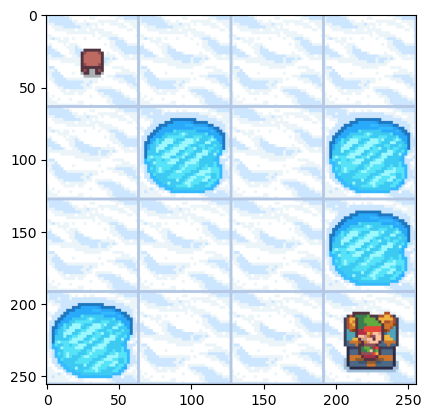

In [22]:
reward=0
t=0
#epsilon=0
state1=env.reset()



episode_Path = []


while t < 100:
    
  action = np.argmax(new_q_learning_table[env.s,:])
  new_state, reward, finished, info,_  = env.step(action)
  
  screen = env.render()
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  
  t += 1
  

  if finished:
    break

ipythondisplay.clear_output(wait=True)
env.close()
if new_state == 15:
    print("The goal is reached")
else:
    print("Nooooo, we fell into a hole")

# We print the number of step it took.
